In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
aire_sin = pd.read_csv("../CSV_limpios/aire.csv")
crimen_sin = pd.read_csv("../CSV_limpios/crimen.csv")

aire_all = pd.read_csv("../CSV_limpios/aire_v2.csv")
crimen_all = pd.read_csv("../CSV_limpios/crimen_v2.csv")

crimen_o3 = pd.read_csv("../CSV_limpios/crimen_for_plots.csv")
aire_o3 = pd.read_csv("../CSV_limpios/aire_for_plots.csv")

In [3]:
#df_crimen = pd.read_csv("../CSV_limpios/crimen_for_plots.csv")
#df_aire = pd.read_csv("../CSV_limpios/aire_for_plots.csv")

df_crimen = pd.read_csv("../CSV_limpios/crimen_for_plots.csv")
df_aire = pd.read_csv("../CSV_limpios/aire_for_plots.csv")

df_all = pd.DataFrame()
df_all['ID'] = aire_sin['ID']
df_all['Dia'] = aire_sin['Dia']
df_all['Mes'] = aire_sin['Mes']
df_all['Anio'] = aire_sin['Anio']
df_all['Alcaldia'] = aire_sin['Alcaldia']
df_all['Latitud'] = aire_sin['Latitud']
df_all['Longitud'] = aire_sin['Longitud']
df_all['Crimenes'] = crimen_sin['countCrimenes']
df_all['AQI'] = aire_sin['avgAQI']
df_all

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI
0,1_1_2016_AZCAP,1,1,2016,AZCAPOTZALCO,19.468405,-99.169792,7,206
1,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.370464,-99.159599,7,184
2,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.365313,-99.291702,10,164
3,1_1_2016_CUAUH,1,1,2016,CUAUHTEMOC,19.411617,-99.152206,12,178
4,1_1_2016_IZTAC,1,1,2016,IZTACALCO,19.384413,-99.117638,12,187
...,...,...,...,...,...,...,...,...,...
15076,31_12_2020_BENIT,31,12,2020,BENITO JUAREZ,19.370464,-99.159599,2,117
15077,31_12_2020_CUAJI,31,12,2020,CUAJIMALPA DE MORELOS,19.357357,-99.262863,2,97
15078,31_12_2020_GUSTA,31,12,2020,GUSTAVO A MADERO,19.482700,-99.094521,24,128
15079,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.360794,-99.073883,15,127


In [10]:
#df_all['Crimenes'].value_counts().plot(kind = 'bar', figsize=(28,12))
#df_all['AQI'].value_counts()[0:100].plot(kind = 'bar', figsize=(28,12))
#df_all['Alcaldia'].value_counts().plot(kind = 'barh', figsize=(15,8))

In [22]:
df_all['Alcaldia'].value_counts()

BENITO JUAREZ            1549
VENUSTIANO CARRANZA      1542
IZTACALCO                1541
TLALPAN                  1377
CUAJIMALPA DE MORELOS    1366
TLAHUAC                  1326
AZCAPOTZALCO             1294
CUAUHTEMOC               1286
MIGUEL HIDALGO           1183
IZTAPALAPA               1057
ALVARO OBREGON            682
GUSTAVO A MADERO          520
MILPA ALTA                358
Name: Alcaldia, dtype: int64

In [4]:
alc_mapper = {"BENITO JUAREZ": 1,
              "VENUSTIANO CARRANZA": 2,
              "IZTACALCO": 3,
              "TLALPAN": 4,
              "CUAJIMALPA DE MORELOS": 5,
              "TLAHUAC": 6,
              "AZCAPOTZALCO": 7,
              "CUAUHTEMOC": 8,
              "MIGUEL HIDALGO": 9,
              "IZTAPALAPA": 10,
              "ALVARO OBREGON": 11,
              "GUSTAVO A MADERO": 12,
              "MILPA ALTA": 13}

In [11]:
df_all['Alcaldia_num'] = df_all['Alcaldia'].replace(alc_mapper)
df_all

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI,Alcaldia_num
0,1_1_2016_AZCAP,1,1,2016,AZCAPOTZALCO,19.468405,-99.169792,7,206,7
1,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.370464,-99.159599,7,184,1
2,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.365313,-99.291702,10,164,5
3,1_1_2016_CUAUH,1,1,2016,CUAUHTEMOC,19.411617,-99.152206,12,178,8
4,1_1_2016_IZTAC,1,1,2016,IZTACALCO,19.384413,-99.117638,12,187,3
...,...,...,...,...,...,...,...,...,...,...
15076,31_12_2020_BENIT,31,12,2020,BENITO JUAREZ,19.370464,-99.159599,2,117,1
15077,31_12_2020_CUAJI,31,12,2020,CUAJIMALPA DE MORELOS,19.357357,-99.262863,2,97,5
15078,31_12_2020_GUSTA,31,12,2020,GUSTAVO A MADERO,19.482700,-99.094521,24,128,12
15079,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.360794,-99.073883,15,127,10


## Transforming the data

In [14]:
df_all[['Crimenes', 'AQI']].describe()

,Crimenes,AQI
count,15081.000000,15081.000000
mean,16.324912,104.423049
std,13.728535,30.237632
min,1.000000,15.000000
25%,7.000000,81.000000
50%,12.000000,104.000000
75%,21.000000,128.000000
max,103.000000,234.000000


In [23]:
scaler = StandardScaler()

df_all[['Crimenes_T', 'AQI_T']] = scaler.fit_transform(df_all[['Crimenes', 'AQI']])

In [32]:
df_std = df_all[(df_all['Crimenes_T'] < 3) & (df_all['AQI_T'] < 3)].reset_index(drop=True)
df_std

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI,Alcaldia_num,Crimenes_T,AQI_T
0,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.370464,-99.159599,7,184,1,-0.679258,2.631806
1,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.365313,-99.291702,10,164,5,-0.460728,1.970357
2,1_1_2016_CUAUH,1,1,2016,CUAUHTEMOC,19.411617,-99.152206,12,178,8,-0.315041,2.433371
3,1_1_2016_IZTAC,1,1,2016,IZTACALCO,19.384413,-99.117638,12,187,3,-0.315041,2.731024
4,1_1_2016_MIGUE,1,1,2016,MIGUEL HIDALGO,19.404051,-99.202660,6,180,9,-0.752102,2.499516
...,...,...,...,...,...,...,...,...,...,...,...,...
14724,31_12_2020_BENIT,31,12,2020,BENITO JUAREZ,19.370464,-99.159599,2,117,1,-1.043475,0.415951
14725,31_12_2020_CUAJI,31,12,2020,CUAJIMALPA DE MORELOS,19.357357,-99.262863,2,97,5,-1.043475,-0.245499
14726,31_12_2020_GUSTA,31,12,2020,GUSTAVO A MADERO,19.482700,-99.094521,24,128,12,0.559079,0.779748
14727,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.360794,-99.073883,15,127,10,-0.096511,0.746676


In [33]:
df_std[['Crimenes_T', 'AQI_T']].describe()

,Crimenes_T,AQI_T
count,14729.000000,14729.000000
mean,-0.088549,-0.009507
std,0.820059,0.999895
min,-1.116319,-2.957441
25%,-0.752102,-0.774658
50%,-0.315041,-0.047064
75%,0.267706,0.746676
max,2.962912,2.995603


In [34]:
df_all[['Crimenes_T', 'AQI_T']].describe()

,Crimenes_T,AQI_T
count,1.508100e+04,1.508100e+04
mean,2.541515e-15,3.390078e-16
std,1.000033e+00,1.000033e+00
min,-1.116319e+00,-2.957441e+00
25%,-6.792583e-01,-7.746581e-01
50%,-3.150413e-01,-1.399127e-02
75%,3.405493e-01,7.797480e-01
max,6.313708e+00,4.285430e+00


In [42]:
#df_all[(df_all['Crimenes_T'] >= 3) & (df_all['AQI_T'] >= 3)]
#df_all[(df_all['Crimenes_T'] >= 3)]
#df_all[(df_all['AQI_T'] >= 3)]
 
#df_all[(df_all['Crimenes_T'] < 3) & (df_all['AQI_T'] < 3)]

#df_all

## Identificando el numero optimo de clusters

In [45]:

def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    #Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

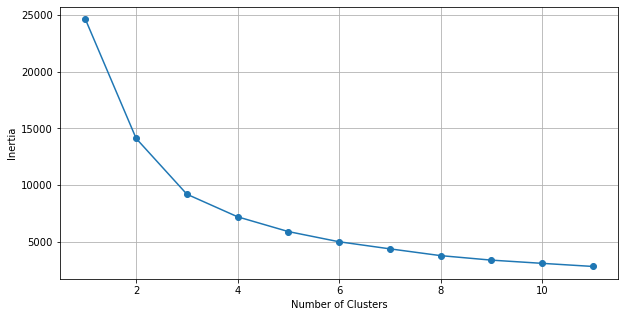

In [47]:
optimise_k_means(df_std[['Crimenes_T', 'AQI_T']], 12)

In [48]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_std[['AQI_T', 'Crimenes_T']])

df_std['kmeans_6'] = kmeans.labels_

In [54]:
df_std

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI,Alcaldia_num,Crimenes_T,AQI_T,kmeans_6
0,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.370464,-99.159599,7,184,1,-0.679258,2.631806,1
1,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.365313,-99.291702,10,164,5,-0.460728,1.970357,1
2,1_1_2016_CUAUH,1,1,2016,CUAUHTEMOC,19.411617,-99.152206,12,178,8,-0.315041,2.433371,1
3,1_1_2016_IZTAC,1,1,2016,IZTACALCO,19.384413,-99.117638,12,187,3,-0.315041,2.731024,1
4,1_1_2016_MIGUE,1,1,2016,MIGUEL HIDALGO,19.404051,-99.202660,6,180,9,-0.752102,2.499516,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14724,31_12_2020_BENIT,31,12,2020,BENITO JUAREZ,19.370464,-99.159599,2,117,1,-1.043475,0.415951,2
14725,31_12_2020_CUAJI,31,12,2020,CUAJIMALPA DE MORELOS,19.357357,-99.262863,2,97,5,-1.043475,-0.245499,2
14726,31_12_2020_GUSTA,31,12,2020,GUSTAVO A MADERO,19.482700,-99.094521,24,128,12,0.559079,0.779748,5
14727,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.360794,-99.073883,15,127,10,-0.096511,0.746676,1


In [53]:
df_std['kmeans_6'].value_counts()

2    4081
0    3095
1    2723
4    1974
5    1964
3     892
Name: kmeans_6, dtype: int64

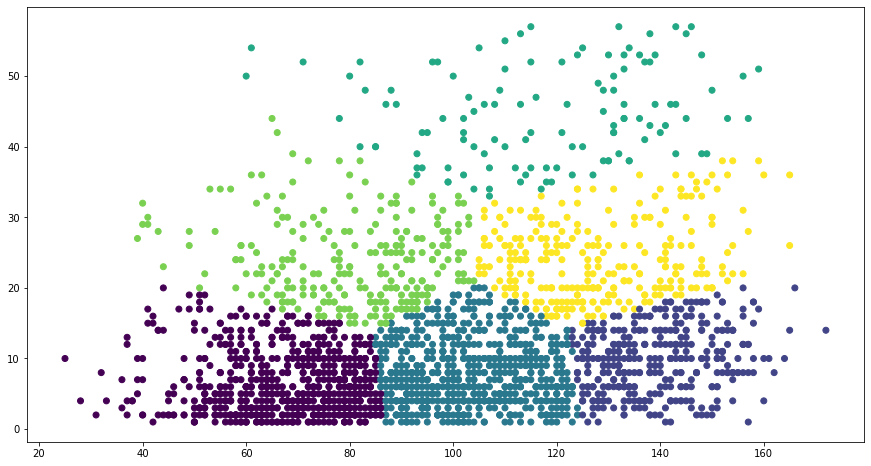

In [64]:
fig = plt.subplots(figsize=(15,8))
plt.scatter(x = df_2020['AQI'], y = df_2020['Crimenes'], c=df_2020['kmeans_6'])
plt.show()

In [102]:
#df_2020 = df_std[(df_std['Anio'] == 2020) & (df_std['Alcaldia_num'] == 1)]
df_2020 = df_std[(df_std['Anio'] == 2020)]

In [107]:
df_std = df_std.iloc[0:,0:13]

In [97]:
for k in range(2, 8):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df_std[['AQI_T', 'Crimenes_T']])
        df_std[f'Kmeans_{k}'] = kmeans.labels_

In [98]:
df_std

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI,Alcaldia_num,Crimenes_T,AQI_T,kmeans_6,Kmeans_2,Kmeans_3,Kmeans_4,Kmeans_5,Kmeans_6,Kmeans_7
0,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.370464,-99.159599,7,184,1,-0.679258,2.631806,1,1,0,3,2,0,4
1,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.365313,-99.291702,10,164,5,-0.460728,1.970357,1,1,0,3,2,0,4
2,1_1_2016_CUAUH,1,1,2016,CUAUHTEMOC,19.411617,-99.152206,12,178,8,-0.315041,2.433371,1,1,0,3,2,0,4
3,1_1_2016_IZTAC,1,1,2016,IZTACALCO,19.384413,-99.117638,12,187,3,-0.315041,2.731024,1,1,0,3,2,0,4
4,1_1_2016_MIGUE,1,1,2016,MIGUEL HIDALGO,19.404051,-99.202660,6,180,9,-0.752102,2.499516,1,1,0,3,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14724,31_12_2020_BENIT,31,12,2020,BENITO JUAREZ,19.370464,-99.159599,2,117,1,-1.043475,0.415951,2,1,0,2,4,5,0
14725,31_12_2020_CUAJI,31,12,2020,CUAJIMALPA DE MORELOS,19.357357,-99.262863,2,97,5,-1.043475,-0.245499,2,0,1,2,4,5,5
14726,31_12_2020_GUSTA,31,12,2020,GUSTAVO A MADERO,19.482700,-99.094521,24,128,12,0.559079,0.779748,5,1,0,3,1,2,2
14727,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.360794,-99.073883,15,127,10,-0.096511,0.746676,1,1,0,3,2,0,0


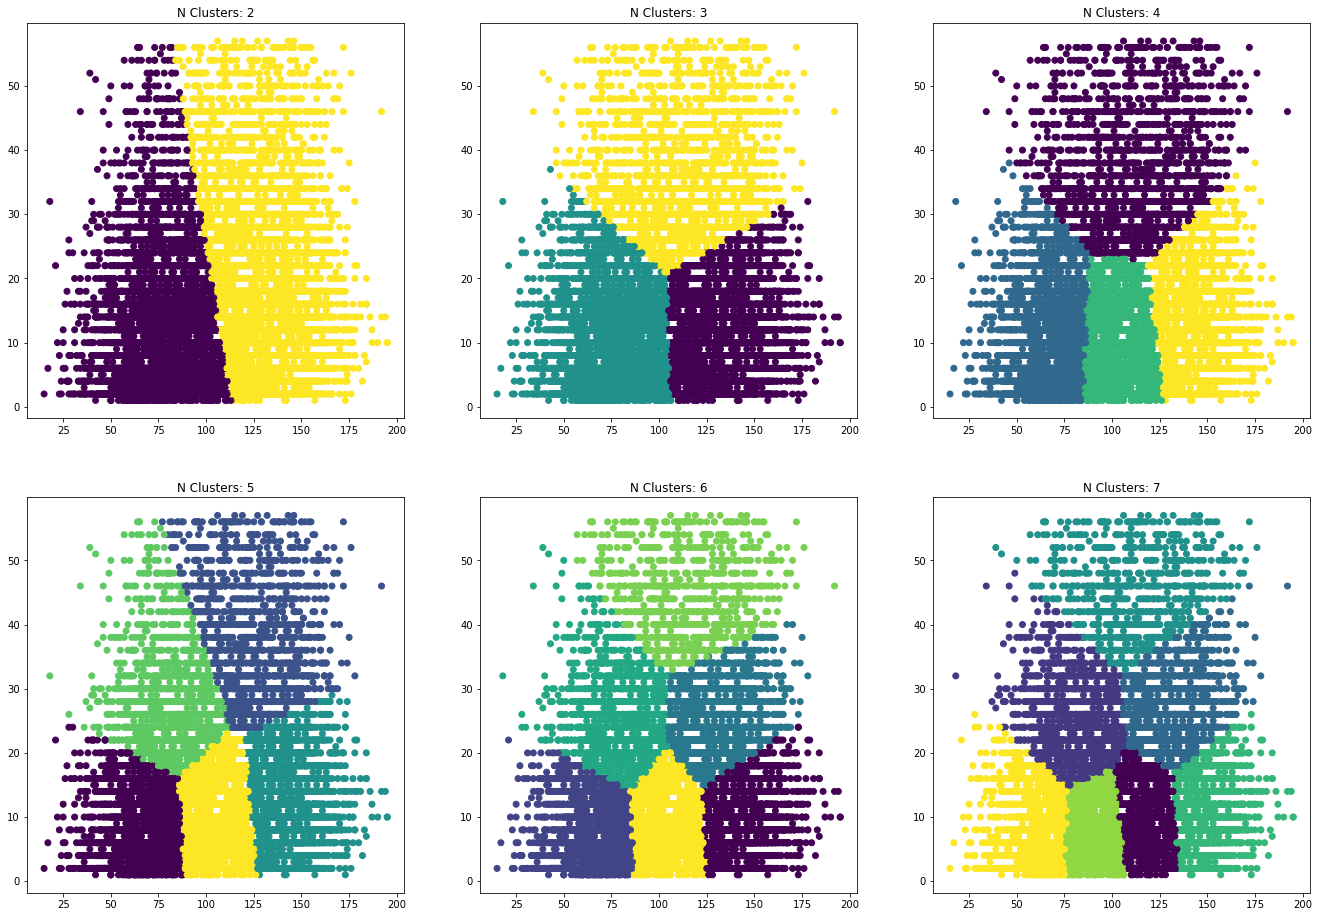

In [104]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(23,16))

for i, ax in enumerate(fig.axes, start=2):
    ax.scatter(x = df_std['AQI'], y = df_std['Crimenes'], c=df_std[f'Kmeans_{i}'])
    ax.set_title(f'N Clusters: {i}')

In [105]:
import mpl_toolkits
from sklearn import linear_model

In [124]:
df_test = df_std[(df_std['Anio'] == 2020) & (df_std['Alcaldia_num'] == 1)]

In [153]:
df_test[(df_test['kmeans_6'] == 1)]['AQI'].max()

158

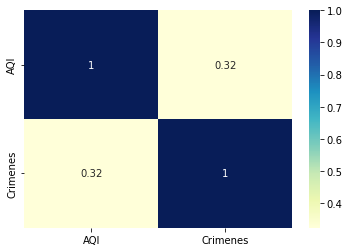

In [112]:
sns.heatmap(df_test[['AQI', 'Crimenes']].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [125]:
AQI_df = df_test[['AQI', 'Crimenes']].drop('Crimenes', axis='columns')
#AQI_df = AQI_df.reset_index(drop=True)
AQI_df

,AQI
12252,117
12259,58
12265,86
12272,124
12278,104
...,...
14697,85
14704,101
14711,133
14718,112


In [126]:
Crimenes = df_test['Crimenes']
Crimenes

12252    13
12259    16
12265    14
12272     3
12278     6
         ..
14697     4
14704     5
14711     8
14718    10
14724     2
Name: Crimenes, Length: 325, dtype: int64

In [127]:
lr = linear_model.LinearRegression()

lr.fit(AQI_df, Crimenes)

LinearRegression()

In [128]:
lr.predict([[117]])

C:\Users\dgonz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.77980284])

In [129]:
Crimes_predict = lr.predict(AQI_df)

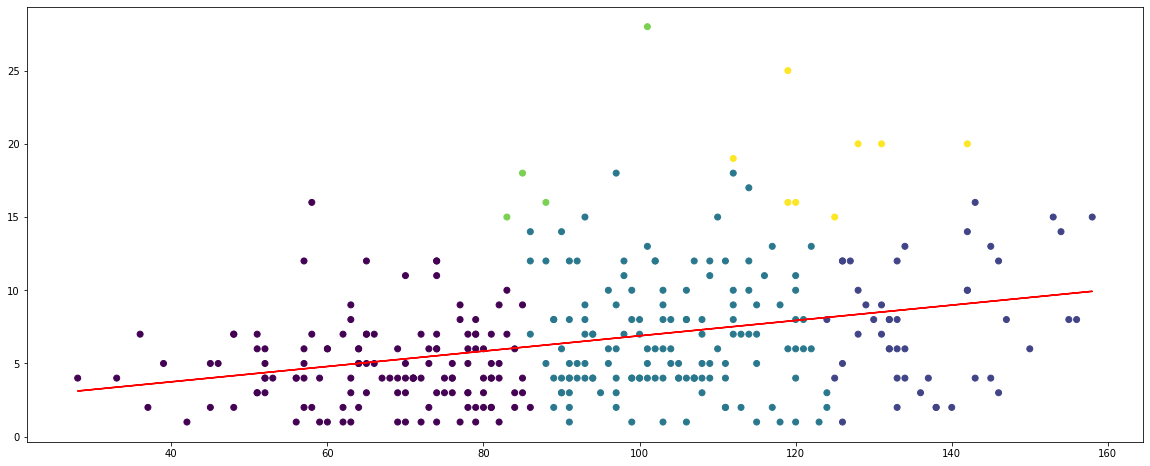

In [133]:
plt.figure(figsize=(20, 8))
plt.scatter(x = df_test['AQI'], y = df_test['Crimenes'], c=df_test['kmeans_6'])
plt.plot(df_test['AQI'], Crimes_predict, 'r')
plt.show()

In [134]:
print("Intercept: ", lr.intercept_)

print("Slope: ", lr.coef_) 

Intercept:  1.652979695088396
Slope:  [0.05236601]


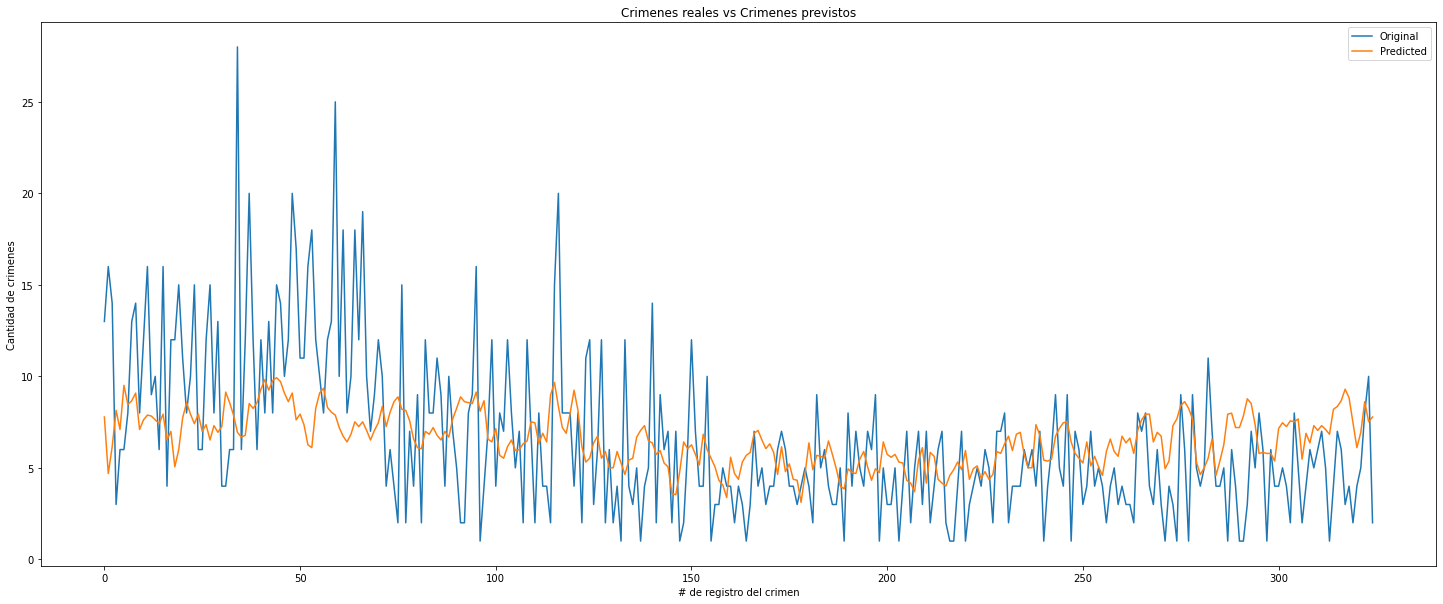

In [140]:
plt.figure(figsize=(25, 10))
x_ax = range(len(df_test['Crimenes']))

plt.plot(x_ax, df_test['Crimenes'], label="Original")
plt.plot(x_ax, Crimes_predict, label="Predicted")

plt.title("Crimenes reales vs Crimenes previstos")
plt.xlabel("# de registro del crimen")
plt.ylabel("Cantidad de crimenes")
plt.legend()
plt.show()

In [149]:

AQI_1 = 78
crimes_predicted_1 = round(lr.predict([ [AQI_1] ])[0])

print(f'Se predicen {crimes_predicted_1} crimenes en ese día con un promedio de AQI de {AQI_1}')


#78 es el AQI a las 19:46 en Benito Juarez

Se predicen 6 crimenes en ese día con un promedio de AQI de 78


C:\Users\dgonz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [155]:
AQI_df = df_test[['AQI', 'kmeans_6']].drop('kmeans_6', axis='columns')
#AQI_df = AQI_df.reset_index(drop=True)
AQI_df

,AQI
12252,117
12259,58
12265,86
12272,124
12278,104
...,...
14697,85
14704,101
14711,133
14718,112


In [156]:
Cluster = df_test['kmeans_6']
Cluster

12252    2
12259    0
12265    2
12272    2
12278    2
        ..
14697    0
14704    2
14711    1
14718    2
14724    2
Name: kmeans_6, Length: 325, dtype: int32

In [157]:
lr = linear_model.LinearRegression()

lr.fit(AQI_df, Cluster)

LinearRegression()

In [158]:
Cluster_predict = lr.predict(AQI_df)

In [169]:
AQI_1 = 90
cluster_round = round(lr.predict([[AQI_1]])[0])

min_crime = df_test[(df_test['kmeans_6'] == cluster_round)]['Crimenes'].min()
max_crime = df_test[(df_test['kmeans_6'] == cluster_round)]['Crimenes'].max()

print(f'Se predice que la cantidad de crimenes en ese día ronde entre {min_crime} y {max_crime} en ese día con un promedio de AQI de {AQI_1}, ya que pertenece al cluster {cluster_round}')

Se predice que la cantidad de crimenes en ese día ronde entre 1 y 16 en ese día con un promedio de AQI de 90, ya que pertenece al cluster 1


C:\Users\dgonz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [173]:
Cluster_predict_round = [round(item) for item in Cluster_predict]

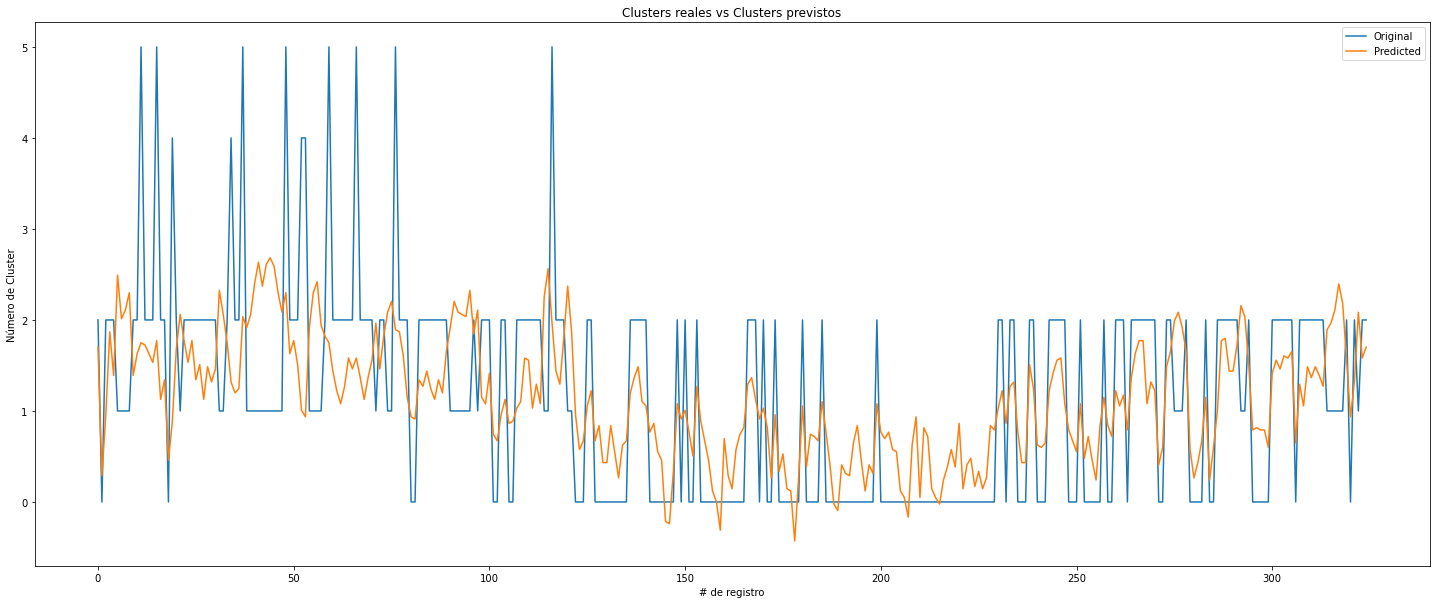

In [178]:
plt.figure(figsize=(25, 10))
x_ax = range(len(df_test['kmeans_6']))

plt.plot(x_ax, df_test['kmeans_6'], label="Original")
plt.plot(x_ax, Cluster_predict, label="Predicted")

plt.title("Clusters reales vs Clusters previstos")
plt.xlabel("# de registro")
plt.ylabel("Número de Cluster")
plt.legend()
plt.show()